In [42]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
import pandas as pd
df_Churn = pd.read_csv("Churn_Modeling.csv")
df_Churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Unnamed: 14,Unnamed: 15
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,NaN,active with different functionalities with ban...
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaN,NaN
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,NaN,salary estimated by bank
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaN,NaN
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NaN,NaN
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,NaN,NaN
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,NaN,NaN
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,NaN,NaN


In [2]:
df_Churn['Exited'] = df_Churn['Exited'].replace([0,1],['Reject', 'Approved'])

In [3]:
df_Churn.to_csv('Churn_Modeling1.csv')

<ipython-input-43-26044f76670b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_Churn.corr()


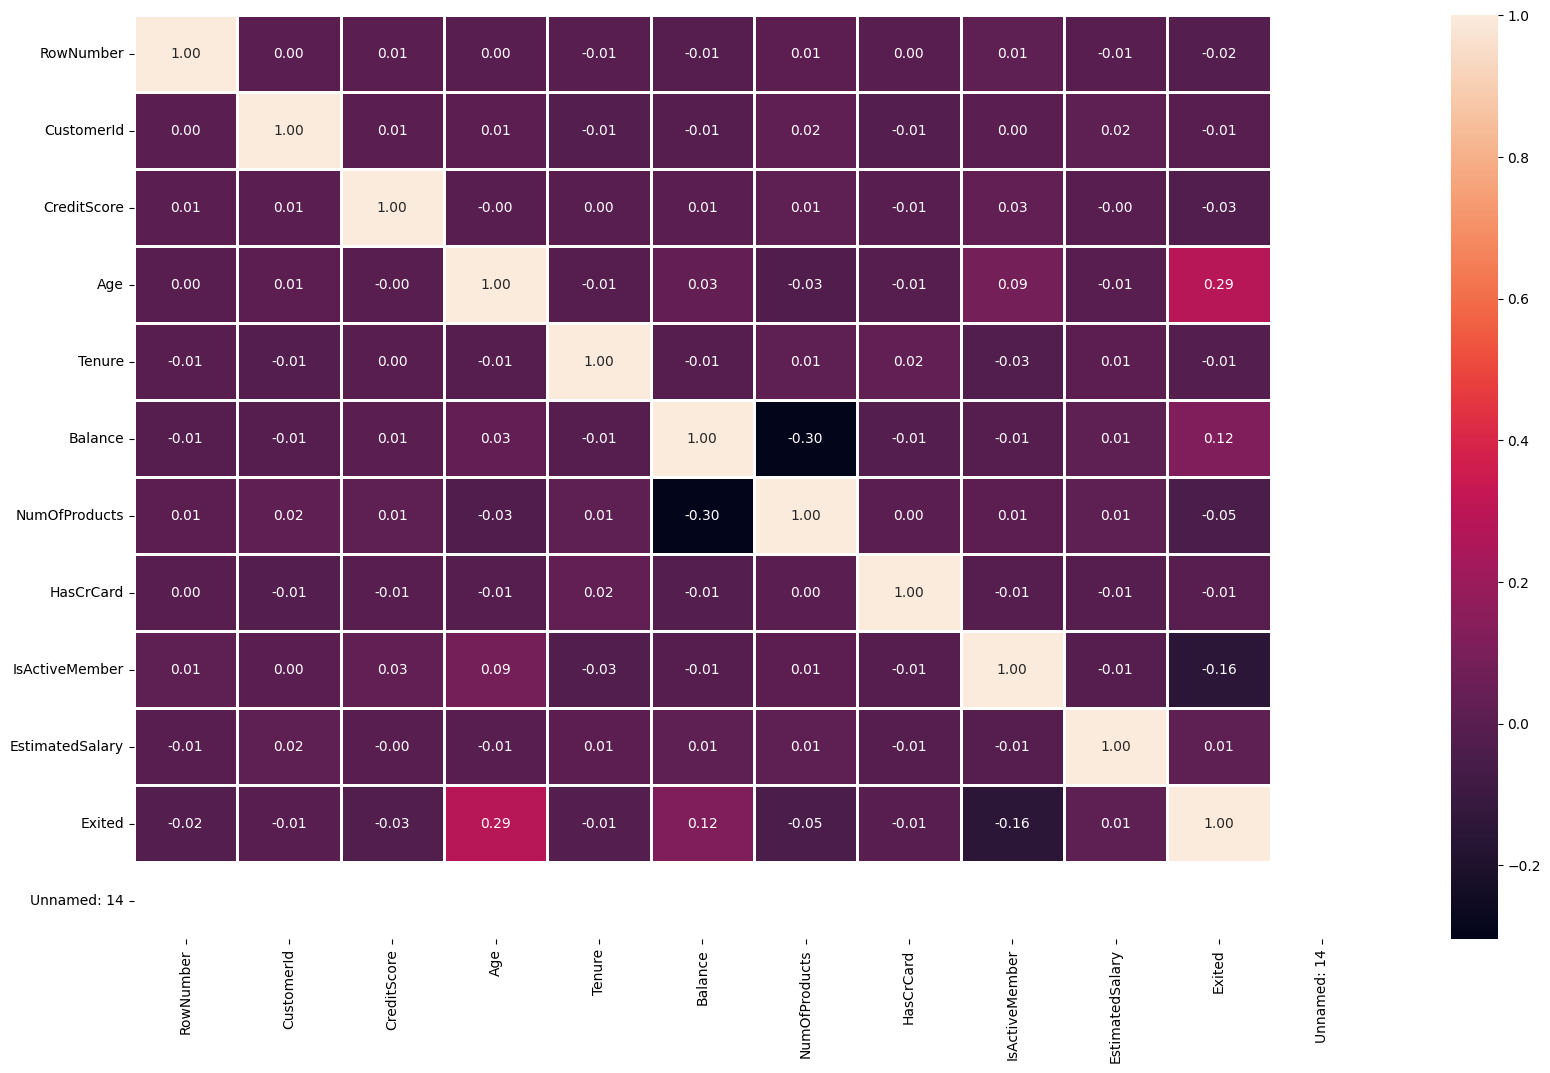

In [43]:
# heatmap

plt.figure(figsize = (20, 12))

corr = df_Churn.corr()

sbs.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [35]:
X = df_Churn[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [36]:
y = df_Churn[['Exited']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [8]:
# Random Forest:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=20).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

<ipython-input-8-d65cd88c5e86>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier(random_state=20).fit(X_train, y_train)


0.841

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
# Print confusion matrix
confusion_matrix(y_pred, y_test)


array([[ 168,   72],
       [ 246, 1514]])

In [15]:

# Print classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    Approved       0.41      0.70      0.51       240
      Reject       0.95      0.86      0.90      1760

    accuracy                           0.84      2000
   macro avg       0.68      0.78      0.71      2000
weighted avg       0.89      0.84      0.86      2000



In [ ]:
features = list(zip(df_Churn['CreditScore'],df_Churn['Age'],df_Churn['Tenure'],df_Churn['Balance'],df_Churn['NumOfProducts'],df_Churn['HasCrCard'],df_Churn['IsActiveMember'],df_Churn['EstimatedSalary']))
import pickle
rf_model.fit(features,df_Churn['Exited'])
pickle.dump(rf_model, open('model.pkl','wb'))

In [18]:
# Artificial Neural Network
from sklearn.neural_network import MLPClassifier
mlpc_model = MLPClassifier(random_state=20).fit(X_train, y_train)
y_pred = mlpc_model.predict(X_test)
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.63

In [19]:

# Print classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    Approved       0.40      0.25      0.31       658
      Reject       0.69      0.82      0.75      1342

    accuracy                           0.63      2000
   macro avg       0.55      0.53      0.53      2000
weighted avg       0.59      0.63      0.60      2000



In [20]:
# Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=20).fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.848

In [21]:

# Print classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    Approved       0.39      0.76      0.51       212
      Reject       0.97      0.86      0.91      1788

    accuracy                           0.85      2000
   macro avg       0.68      0.81      0.71      2000
weighted avg       0.91      0.85      0.87      2000



In [38]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=20, eval_metric='mlogloss').fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.836

In [39]:

# Print classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1752
           1       0.40      0.67      0.50       248

    accuracy                           0.84      2000
   macro avg       0.68      0.77      0.70      2000
weighted avg       0.88      0.84      0.85      2000



In [25]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=20).fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 6377, number of negative: 1623
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.797125 -> initscore=1.368421
[LightGBM] [Info] Start training from score 1.368421


0.8425

In [26]:

# Print classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    Approved       0.42      0.70      0.52       247
      Reject       0.95      0.86      0.91      1753

    accuracy                           0.84      2000
   macro avg       0.69      0.78      0.71      2000
weighted avg       0.89      0.84      0.86      2000

